<a href="https://colab.research.google.com/github/Miuthula-B/FUNDAMENTAL-OF-MACHINE-LEARNING/blob/main/FOML_MINI_PROJECT%5BCALORIES_BURNT_PREDICTION%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES:-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

DATA COLLECTION AND PROCESSING:-

In [ ]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [ ]:
#print the first five rows of the data frame
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')


In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


COMBINING THE TWO DATA FRAMES:-

In [ ]:
calories_data=pd.concat([exercise_data,calories['Calories']],axis=1)


In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


CHECKING THE NUMBER OF THE ROWS AND COLUMNS:-

In [ ]:
calories_data.shape

(15000, 9)

In [ ]:
#getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#checking for missing values
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


DATA ANALYSIS:-

In [ ]:
#get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


DATA VISUALIZATION:-

In [ ]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

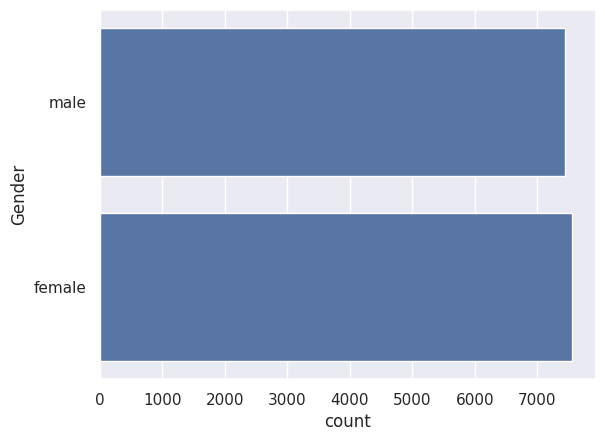

In [ ]:
#plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

<ipython-input-61-20df4887de41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

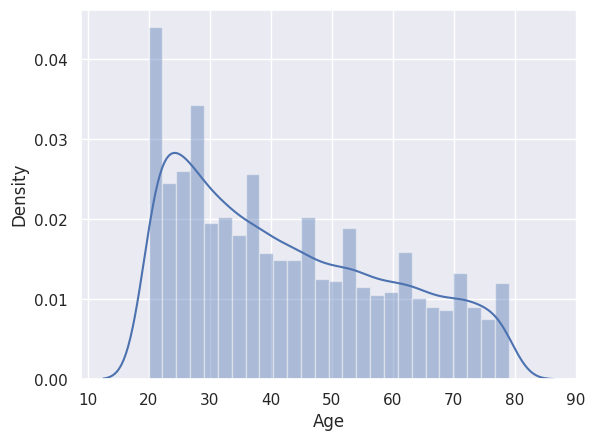

In [ ]:
#finding the distribution of the "Age" column
sns.distplot(calories_data['Age'])

<ipython-input-62-a4af93d8f595>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

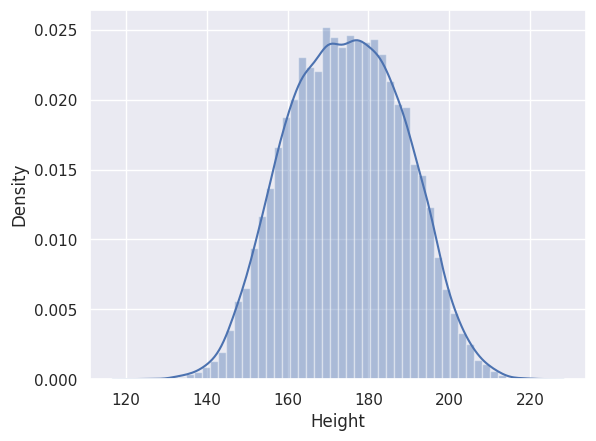

In [ ]:
#finding the distribution of the "Height" column
sns.distplot(calories_data['Height'])

<ipython-input-63-1d5e6c3cc0c5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

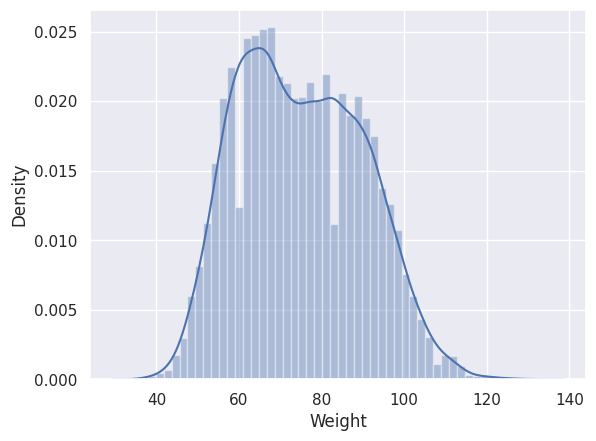

In [ ]:
#finding the distribution of the "Weight" column
sns.distplot(calories_data['Weight'])

<ipython-input-64-cc8a27ece2e6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

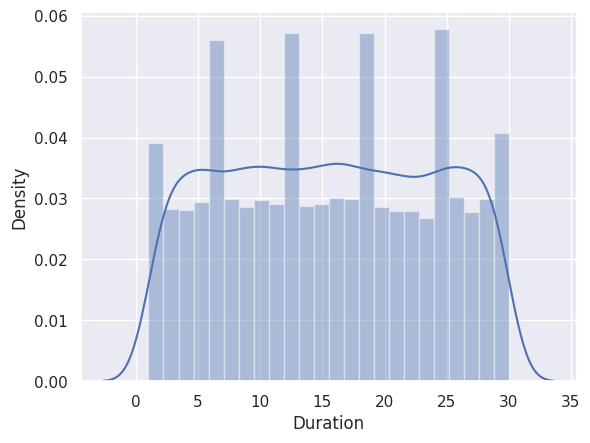

In [ ]:
#finding the distribution of the "Duration" column
sns.distplot(calories_data['Duration'])

<ipython-input-65-9b35f64cb758>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

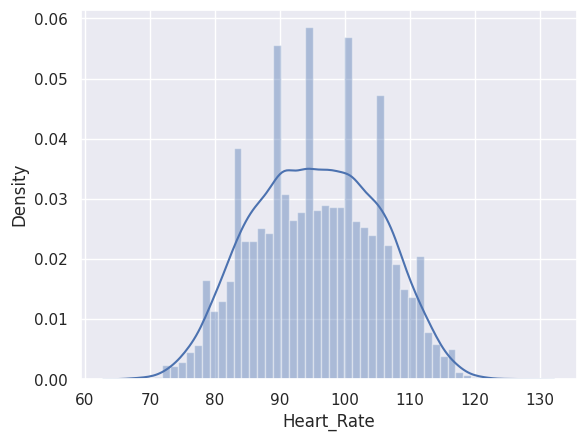

In [ ]:
#finding the distribution of the "Heart_Rate" column
sns.distplot(calories_data['Heart_Rate'])

<ipython-input-66-5f486a380606>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

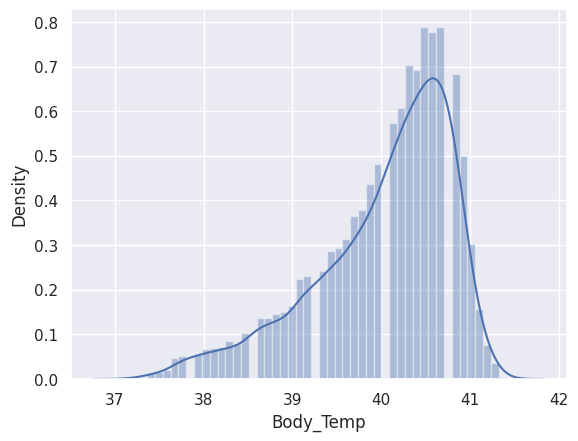

In [ ]:
#finding the distribution of the "Body_Temp" column
sns.distplot(calories_data['Body_Temp'])

<ipython-input-67-07389cfbc563>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

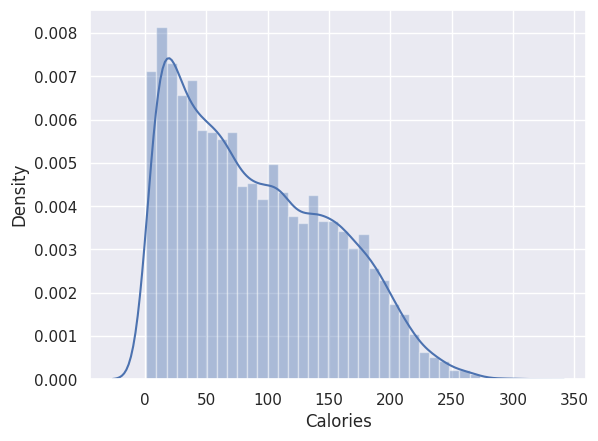

In [ ]:
#finding the distribution of the "Calories" column
sns.distplot(calories_data['Calories'])

FINDING CORRELATION IN THE DATASET
1.Positive correlation
2.Negative correlation

In [ ]:
# Convert categorical columns to numeric using one-hot encoding.
calories_data = pd.get_dummies(calories_data, columns=['Gender'])

# Now calculate the correlation
correlation = calories_data.corr()

<Axes: >

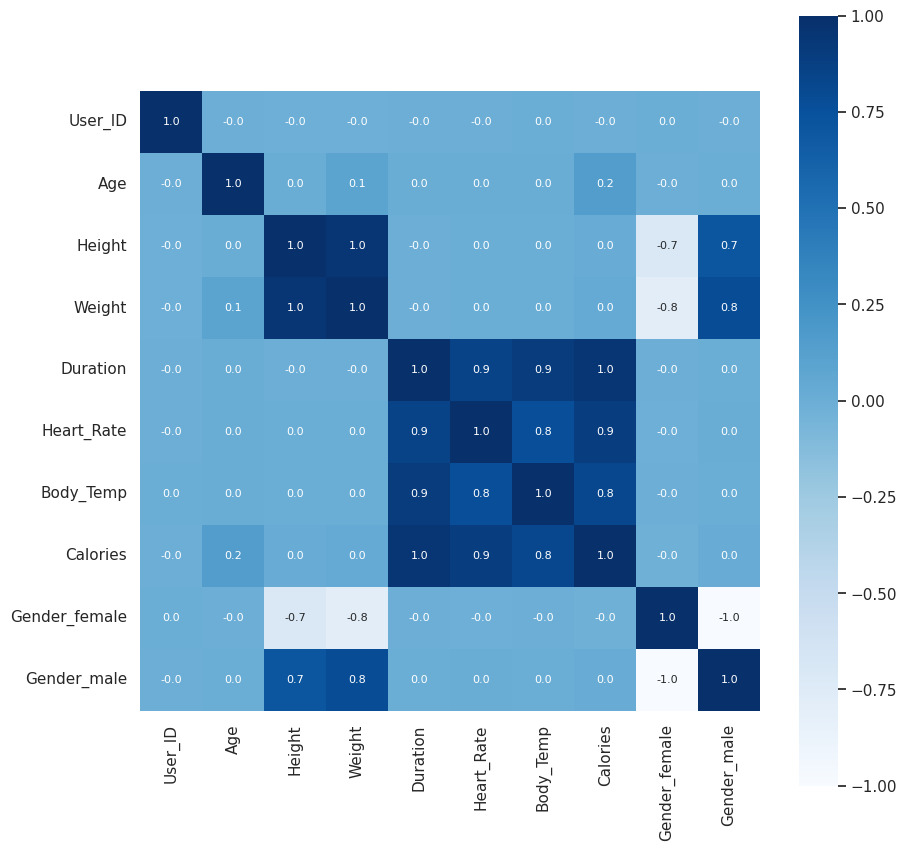

In [ ]:
plt.figure(figsize=(10,10))
# Correct the function name from 'haetmap' to 'heatmap'
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

Converting the text data to numerical values

In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}})

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,False,True
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,True,False
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,False,True
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,True,False
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,True,False
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,20,193.0,86.0,11.0,92.0,40.4,45.0,True,False
14996,17212577,27,165.0,65.0,6.0,85.0,39.2,23.0,True,False
14997,17271188,43,159.0,58.0,16.0,90.0,40.1,75.0,True,False
14998,18643037,78,193.0,97.0,2.0,84.0,38.3,11.0,False,True


In [ ]:
calories_data.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,False,True
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,True,False
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,False,True
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,True,False
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,True,False


In [ ]:
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y=calories_data['Calories']

In [ ]:
print(X)

       Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Gender_male
0       68   190.0    94.0      29.0       105.0       40.8         True
1       20   166.0    60.0      14.0        94.0       40.3        False
2       69   179.0    79.0       5.0        88.0       38.7         True
3       34   179.0    71.0      13.0       100.0       40.5        False
4       27   154.0    58.0      10.0        81.0       39.8        False
...    ...     ...     ...       ...         ...        ...          ...
14995   20   193.0    86.0      11.0        92.0       40.4        False
14996   27   165.0    65.0       6.0        85.0       39.2        False
14997   43   159.0    58.0      16.0        90.0       40.1        False
14998   78   193.0    97.0       2.0        84.0       38.3         True
14999   63   173.0    79.0      18.0        92.0       40.5         True

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training :-

XGBoost Regressor:-

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
#training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluating the model:-
Prediction on test Data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean Absolute Error:-

In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)


In [ ]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4836762582858403


In [ ]:
#prediction of training data
training_data_prediction = model.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R squared value : ', r2_train)

R squared value :  0.9995691477017405


In [ ]:
#prediction of training data
test_data_prediction = model.predict(X_test)



In [ ]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.998799522480255


Building the Predictive System

In [ ]:
input_data = (16180408,34,179.0,71.0,13.0,100.0,40.5)
# Removed the extra feature

#changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[190.65263]
